In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats as stats

Read the data from the CSV file into a dataframe:

In [2]:
df=pd.read_csv("firearms-combined.csv")

## Effect of State Gun Laws

The column "Total Laws 2014" shows the total number of gun laws in each state as of 2014. The data is from 

https://www.statefirearmlaws.org/resources

Now we have 2 data sources that are both in 2014, but they do not represent two samples from the same population. Instead, they represent two things that may depend on each other.

In [3]:
# Note that I went directly to a numpy array here, instead of making a list first
# The reason for using a numpy array is that we want to apply numpy methods for 
# computing statistics further below!

laws14=np.array(df["Total Laws 2014"])
rate14=np.array(df["RATE-2014"])



Text(0, 0.5, 'Firearms Mortality Rate (2014)')

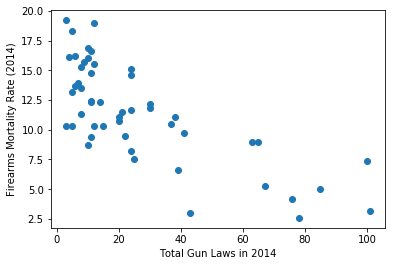

In [4]:
plt.scatter(laws14,rate14)
plt.xlabel("Total Gun Laws in 2014")
plt.ylabel("Firearms Mortality Rate (2014)")

In [5]:
D=np.array([laws14, rate14])

In [6]:
K=np.cov(D)
print("(a)")
print(K)

(a)
[[683.43836735 -80.59102041]
 [-80.59102041  17.22040816]]


In [7]:
rho=K[1,0]/np.sqrt(K[0,0]*K[1,1])
print("(b)")
print(rho)

(b)
-0.74287416686697


In [8]:
# m=rho*np.sqrt(K[1,1]/K[0,0])
# b=np.mean(rate14)-m*np.mean(laws14)
# m,b

In [9]:
m,b,r,p,stderr=stats.linregress(laws14,rate14)
x=np.linspace(0,1,100)
print("(c)")
print("m=",m,", b=",b,sep="")

(c)
m=-0.11791995336903915, b=14.562520365212157


(d)


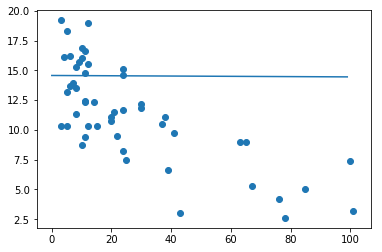

In [10]:
print("(d)")
plt.plot(m*x+b);
plt.scatter(laws14, rate14);

In [11]:
l,U=np.linalg.eigh(K)
print("(e)")
print(U)

(e)
[[-0.11840886 -0.99296492]
 [-0.99296492  0.11840886]]


In [12]:
D2=U.T@D

In [13]:
K2=np.cov(D2)
print("(f)")
print(K2)

(f)
[[7.61010780e+00 9.97259593e-15]
 [9.97259593e-15 6.93048668e+02]]


In [14]:
# rho2=K2[1,0]/np.sqrt(K2[0,0]*K2[1,1])
# print(rho2)

(g)


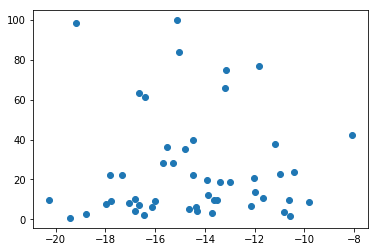

In [15]:
decorrelated_laws14 = D2[0]
decorrelated_rate14 = D2[1]
print("(g)")
plt.scatter(decorrelated_laws14, -decorrelated_rate14);